In [379]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from typing import Tuple, List, Optional, Union, Tuple
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import string
import seaborn as sns
import datetime
from itertools import permutations
import heapq
import csv
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import pickle
import matplotlib.ticker as mtick
import collections
from statsmodels.stats.proportion import proportions_ztest

# pd.options.display.max_colwidth = 500
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [380]:
# .csv configuration
encoding = "utf-8"
delimiter = None
working_directory_path = "./"

# RQ1

## Answer Duration - stack

In [381]:
# sklearn
pure_data = working_directory_path + "" + "plt_df_sklearn_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sklearn_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sklearn = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [382]:
# nltk
pure_data = working_directory_path + "" + "plt_df_nltk_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_nltk_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_nltk = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [383]:
# PT
pure_data = working_directory_path + "" + "plt_df_pt_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_pt_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_pt = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [384]:
# keras
pure_data = working_directory_path + "" + "plt_df_keras_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_keras_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_keras = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [385]:
# hugh
pure_data = working_directory_path + "" + "plt_df_hugh_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_hugh_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_hug = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [386]:
# spark
pure_data = working_directory_path + "" + "plt_df_sp_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sp_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sp = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [387]:
# tf
pure_data = working_directory_path + "" + "plt_df_tf_w_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_tf_wo_ans_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_tf = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [418]:
result_tf

,Question Type,Hours,Type
0,with stack trace,20.207500,"(TensorFlow, First Answer)"
1,with stack trace,0.968611,"(TensorFlow, First Answer)"
2,with stack trace,1.003611,"(TensorFlow, First Answer)"
3,with stack trace,45.674722,"(TensorFlow, First Answer)"
4,with stack trace,3.230278,"(TensorFlow, First Answer)"
...,...,...,...
28449,w/o stack trace,13.190556,"(TensorFlow, First Accepted Answer)"
28450,w/o stack trace,8.836944,"(TensorFlow, First Accepted Answer)"
28451,w/o stack trace,0.190833,"(TensorFlow, First Accepted Answer)"
28452,w/o stack trace,0.878333,"(TensorFlow, First Accepted Answer)"


Text(0.5, 0.98, 'Answers Duration (Questions)')

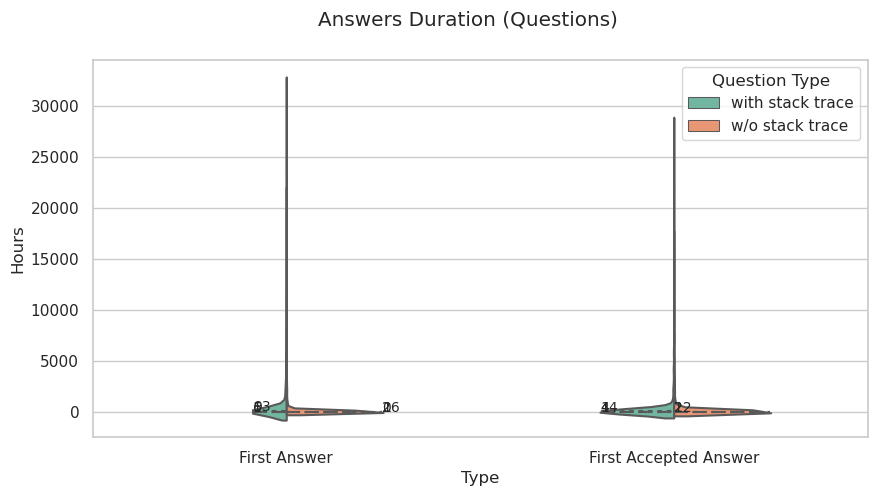

In [414]:
sns.set_theme(style="whitegrid")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

resultComment = pd.concat([df_1, df_2])
resultComment['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

resultAnswer = pd.concat([df_1, df_2])
resultAnswer['Type'] = "First Accepted Answer"
# ###################################################################################

result_2 = pd.concat([resultComment, resultAnswer], ignore_index=True)

fig = plt.figure(figsize=(10, 5), dpi=100)

ax = sns.violinplot(x="Type", 
               y="Hours", 
               data=result_2, 
               hue="Question Type", 
               palette="Set2", #colorblind
               split=True, 
               # scale="count",
               inner="quartile",
               # scale_hue=False,
               width=.5)

# plt.ylim(-5000,10000)
# plt.xlim(-1,1)

for l in ax.lines:
    ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.0f}',size='small') 

fig.suptitle('Answers Duration (Questions)')
# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

In [389]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

(-100.0, 4000.0)

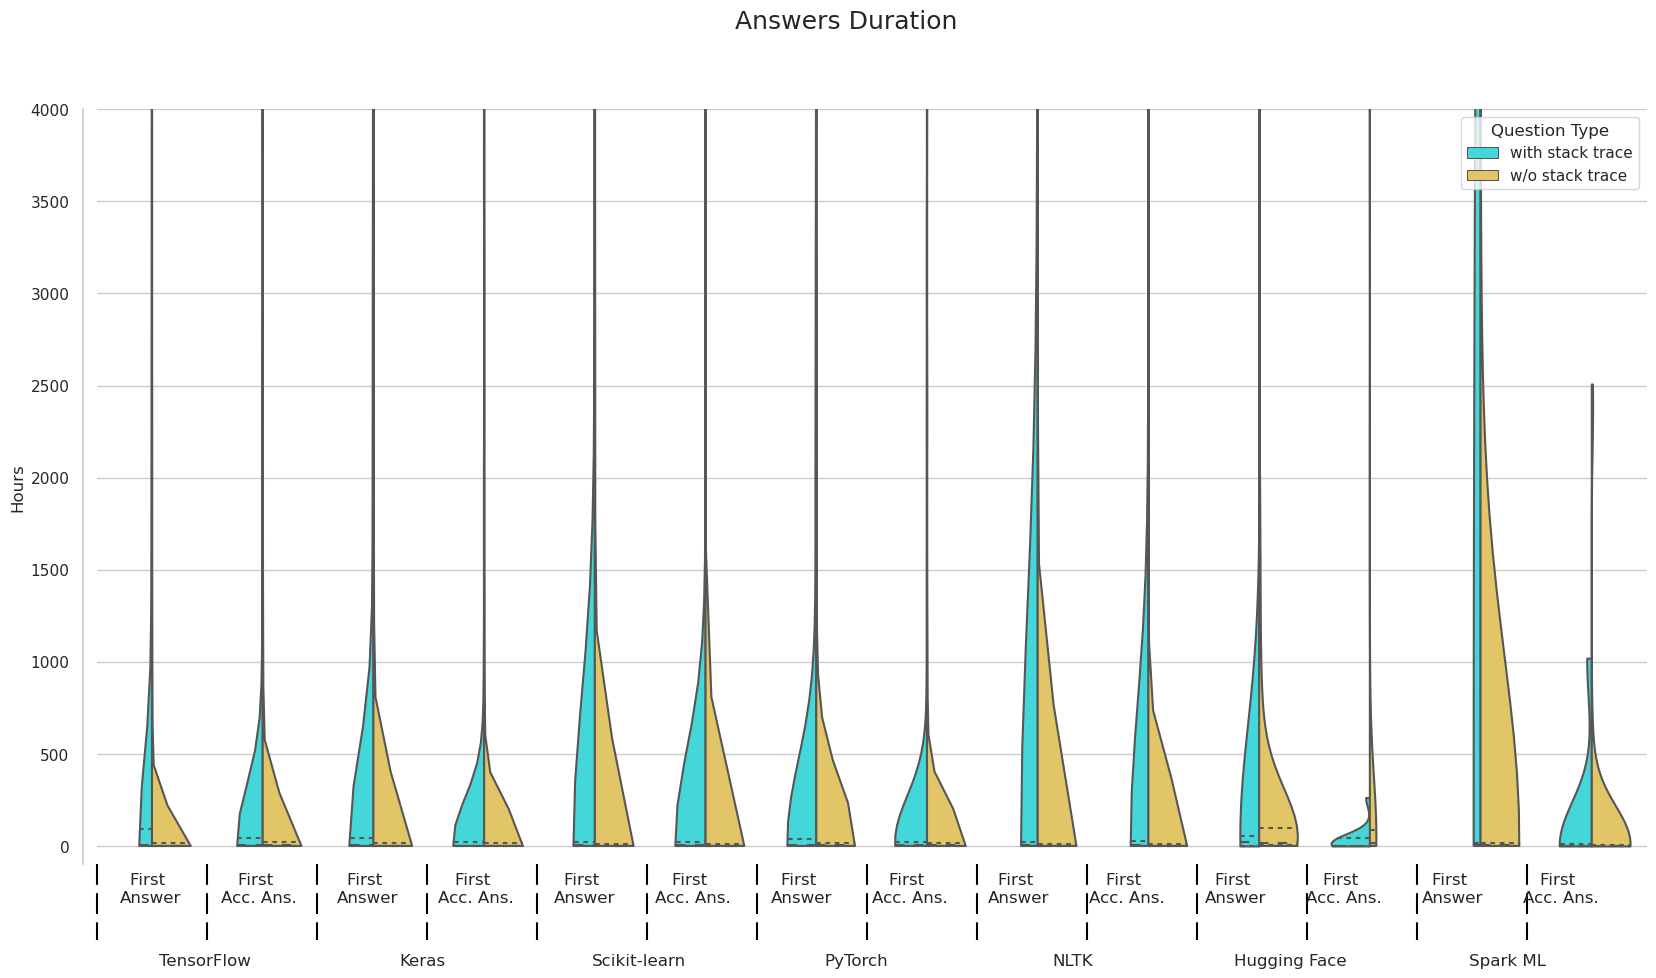

In [412]:
# Example:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

# result = result[result.Hours<30000]

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Hours", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  # dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 4), ('Keras', 4), ('Scikit-learn', 4), ('PyTorch', 4), ('NLTK', 4), ('Hugging Face', 4), ('Spark ML', 4)], 
          [('First \nAnswer', 2), ('First \nAcc. Ans.', 2),
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2)]]
xposs = [] 
yposs = [] 
while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        if rpos == 2:
            ax.text(lxpos- 0.0005, (ypos/2), label, ha='center', transform=ax.transAxes)
            xposs.append(pos * (scale + 0.0005))
            yposs.append(ypos)
            add_line(ax, pos * (scale + 0.0005), ypos, flag=0)
        else:
            ax.text(lxpos, 2*ypos/3, label, ha='center', transform=ax.transAxes)
            # add_line(ax, pos *  (scale + 0.0005), ypos, flag=1)

        pos += rpos
    # add_line(ax, pos * (scale + 0.0007), ypos + 0.025)
    ypos -= .1
    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
fig.suptitle('Answers Duration', fontsize = 18)

# g2.set(title='subtitle')
g2.set(xlabel=None)
# g2.tick_params(bottom=False)  # remove the ticks
g2.set(ylim=(0, 4000))
g2.set_ylim(bottom=-100)
# plt.ylim(-100,6000)

# Labels
# plt.ylabel('Magnitude', fontsize=20)
# plt.xlabel('')

# Legend
# plt.legend(frameon=False, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
# plt.text(5.85, 10.83, 'Legend title', fontsize=20)

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

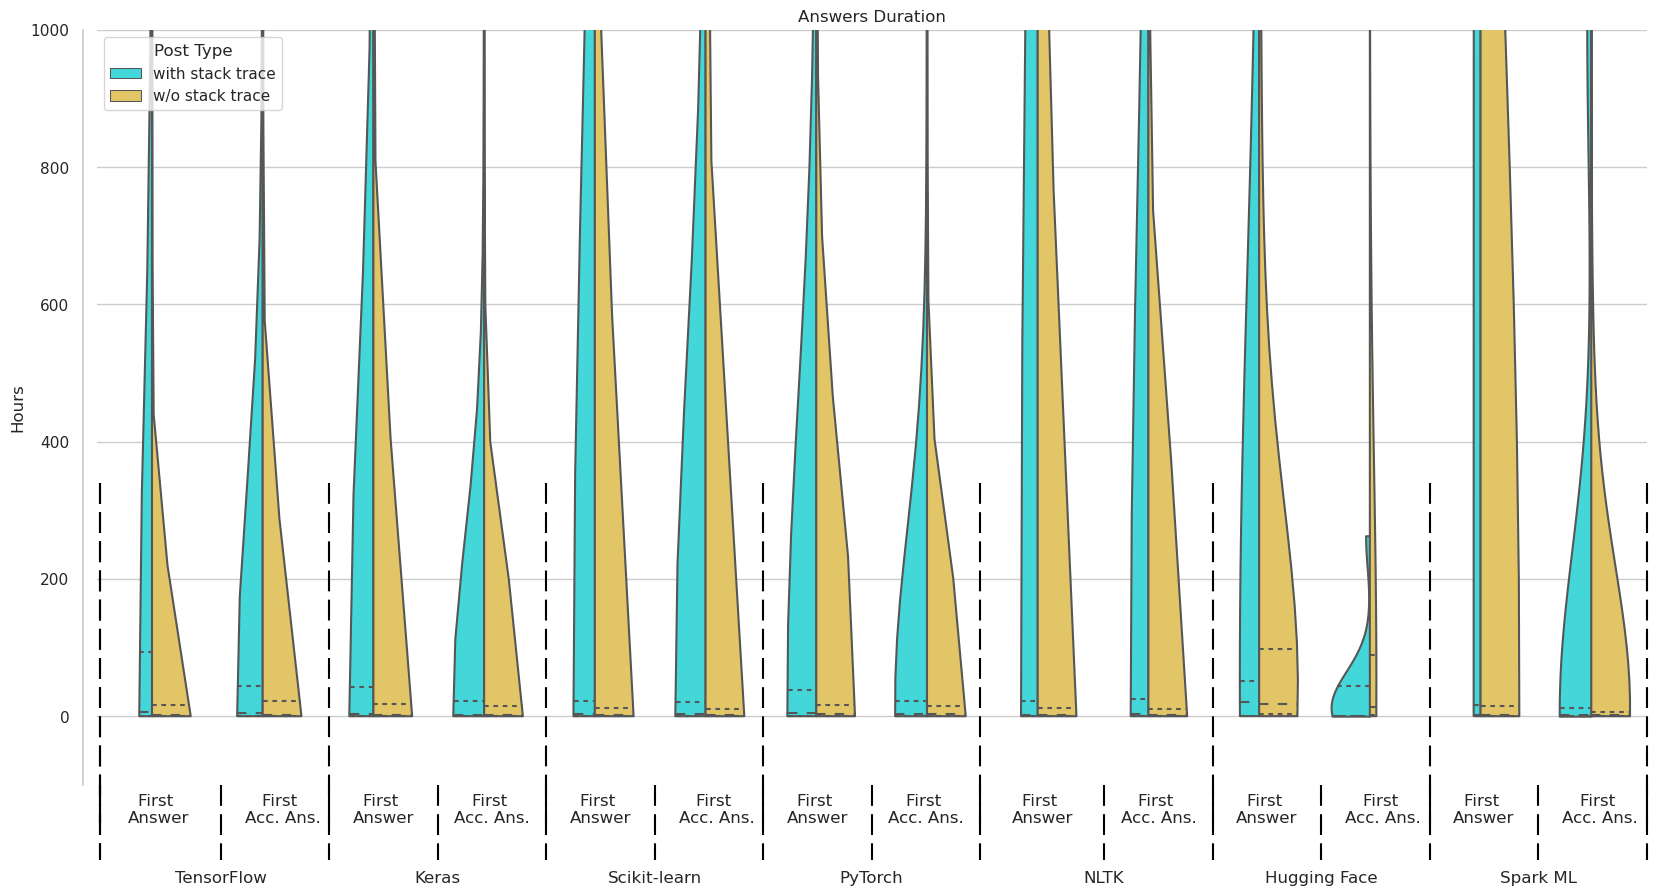

In [411]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

# result = result[result.Hours<30000]

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Hours", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  # dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 4), ('Keras', 4), ('Scikit-learn', 4), ('PyTorch', 4), ('NLTK', 4), ('Hugging Face', 4), ('Spark ML', 4)], 
          [('First \nAnswer', 2), ('First \nAcc. Ans.', 2),
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2), 
           ('First \nAnswer', 2), ('First \nAcc. Ans.', 2)]]

xposs = [0.002, 0.08, 0.15, 0.22, 0.29, 0.36, 0.43, 0.5, 0.57, 0.65, 0.72, 0.79, 0.86, 0.93, 0.002, 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.04, 0.12, 0.185, 0.255, 0.325, 0.40, 0.465, 0.535, 0.61, 0.685, 0.755, 0.83, 0.895, 0.97, 0.08, 0.22, 0.36, 0.5, 0.65, 0.79, 0.93]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        if rpos == 2:
            ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes)
            # ax.text(lxpos- 0.0005, (ypos/2), label, ha='center', transform=ax.transAxes)
            tx_poss.append(lxpos- 0.0005)
            ty_poss.append((ypos/2))
            add_line(ax, xposs[i], yposs[i], flag=0)
        else:
            # ax.text(lxpos, 2*ypos/3, label, ha='center', transform=ax.transAxes)
            ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes)
            # xposs.append(pos * (scale + 0.0005))
            # yposs.append(ypos)
            # add_line(ax, pos *  (scale + 0.0005), ypos, flag=1)
            add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    # add_line(ax, pos * (scale + 0.0007), ypos + 0.025)
    add_line(ax, xposs[i], yposs[i], flag=0)
    add_line(ax, xposs[i], yposs[i], flag=1)
    ypos -= .1

    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# fig.suptitle('Answers Duration', fontsize = 18)

g2.set(title='Answers Duration')
g2.set(xlabel=None)
# g2.tick_params(bottom=False)  # remove the ticks
g2.set(ylim=(0, 1000))
g2.set_ylim(bottom=-100)
# plt.ylim(-100,6000)

# Labels
# plt.ylabel('Magnitude', fontsize=20)
# plt.xlabel('')

# Legend
# plt.legend(frameon=False, fontsize=20, loc='upper left', ncol=2, bbox_to_anchor=(0.85, 1.07))
# plt.text(5.85, 10.83, 'Legend title', fontsize=20)
g2.legend(title='Post Type', loc='upper left')

# for l in g2.lines[1::3]:
#     l.set_linestyle('-')
#     l.set_color('red')
#     l.set_alpha(0.8)

# for l in g2.lines:
#     l.set_linestyle('--')
#     l.set_linewidth(0.6)
#     l.set_color('red')
#     l.set_alpha(0.8)
# for l in g2.lines[1::3]:
#     l.set_linestyle('-')
#     l.set_linewidth(1.2)
#     l.set_color('black')
#     l.set_alpha(0.8)

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')

# plt.show()

In [419]:
ml = "TensorFlow"

In [420]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    5.822778
Name: 50%, dtype: float64

In [421]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    1.886111
Name: 50%, dtype: float64

In [422]:
tmp_w = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [423]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=23412698.5, pvalue=4.2237997807998904e-75)

In [491]:
ml = "Hugging Face"

In [492]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    0.981667
Name: 50%, dtype: float64

In [493]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    14.100278
Name: 50%, dtype: float64

In [494]:
tmp_w = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [495]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=263.0, pvalue=0.10509594056795288)

In [496]:
print(tmp_w_nan.shape[0], ",", tmp_wo_nan.shape[0])

11 , 69


In [464]:
numirator = np.array([8, 54])
denomirator = np.array([16, 110])
print(numirator, denomirator)
z_stat, pval = proportions_ztest(numirator, denomirator, alternative="two-sided")
print('Z-stat: {0:0.2f}'.format(z_stat))
print('P-value: {0:0.2f}'.format(pval))
pval

[ 8 54] [ 16 110]
Z-stat: 0.07
P-value: 0.95


0.945816265273419

In [465]:
39690-5436

34254

## Answer Duration - Question

In [27]:
# sklearn
pure_data = working_directory_path + "" + "plt_sklearn_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_sklearn_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sklearn_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sklearn_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sklearn = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [28]:
# nltk
pure_data = working_directory_path + "" + "plt_nltk_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_nltk_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_nltk_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_nltk_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_nltk = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [29]:
# PT
pure_data = working_directory_path + "" + "plt_pt_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_pt_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_pt_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_pt_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_pt = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [30]:
# keras
pure_data = working_directory_path + "" + "plt_keras_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_keras_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_keras_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_keras_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_keras = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [31]:
# hugh
pure_data = working_directory_path + "" + "plt_hugh_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_hugh_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_hug_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_hug_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_hug = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [32]:
# spark
pure_data = working_directory_path + "" + "plt_sp_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_sp_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_sp_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_sp_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_sp = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [33]:
# tf
pure_data = working_directory_path + "" + "plt_tf_q_w_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_tf_q_wo_code.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_1 = pd.concat([df_1, df_2])
result_tmp_1['Type'] = "First Answer"
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_1['Hours'] = df_tf_w_stack['Duration_acc_ans']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Hours'])
df_2['Hours'] = df_tf_wo_stack['Duration_acc_ans']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")

result_tmp_2 = pd.concat([df_1, df_2])
result_tmp_2['Type'] = "First Accepted Answer"
# ###################################################################################
result_tf = pd.concat([result_tmp_1, result_tmp_2], ignore_index=True)

In [34]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

In [35]:
result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

In [36]:
ml = "Spark ML"

In [37]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    2.437778
Name: 50%, dtype: float64

In [38]:
result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    2.835833
Name: 50%, dtype: float64

In [39]:
tmp_w = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [40]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=498.0, pvalue=0.8036477529828083)

In [41]:
tmp_w_nan.shape

(95, 3)

In [42]:
tmp_wo_nan.shape

(11, 3)

In [43]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Hours    1.792222
Name: 50%, dtype: float64

In [44]:
result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Hours    3.576944
Name: 50%, dtype: float64

In [45]:
tmp_w = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Hours'].isnull()]
tmp_wo = result[(result.Type == (ml, "First Accepted Answer")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Hours'].isnull()]

In [46]:
mannwhitneyu(tmp_w_nan["Hours"], tmp_wo_nan["Hours"])

MannwhitneyuResult(statistic=110.0, pvalue=0.10371789097645114)

In [47]:
tmp_w_nan.shape

(62, 3)

In [48]:
tmp_wo_nan.shape

(6, 3)

## Score

In [49]:
# sklearn
pure_data = working_directory_path + "" + "plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [50]:
# nltk
pure_data = working_directory_path + "" + "plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [51]:
# PT
pure_data = working_directory_path + "" + "plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [52]:
# keras
pure_data = working_directory_path + "" + "plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [53]:
# hugh
pure_data = working_directory_path + "" + "plt_df_hugh_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_hugh_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [54]:
# spark
pure_data = working_directory_path + "" + "plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [55]:
# tf
pure_data = working_directory_path + "" + "plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Score']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Score']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [56]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

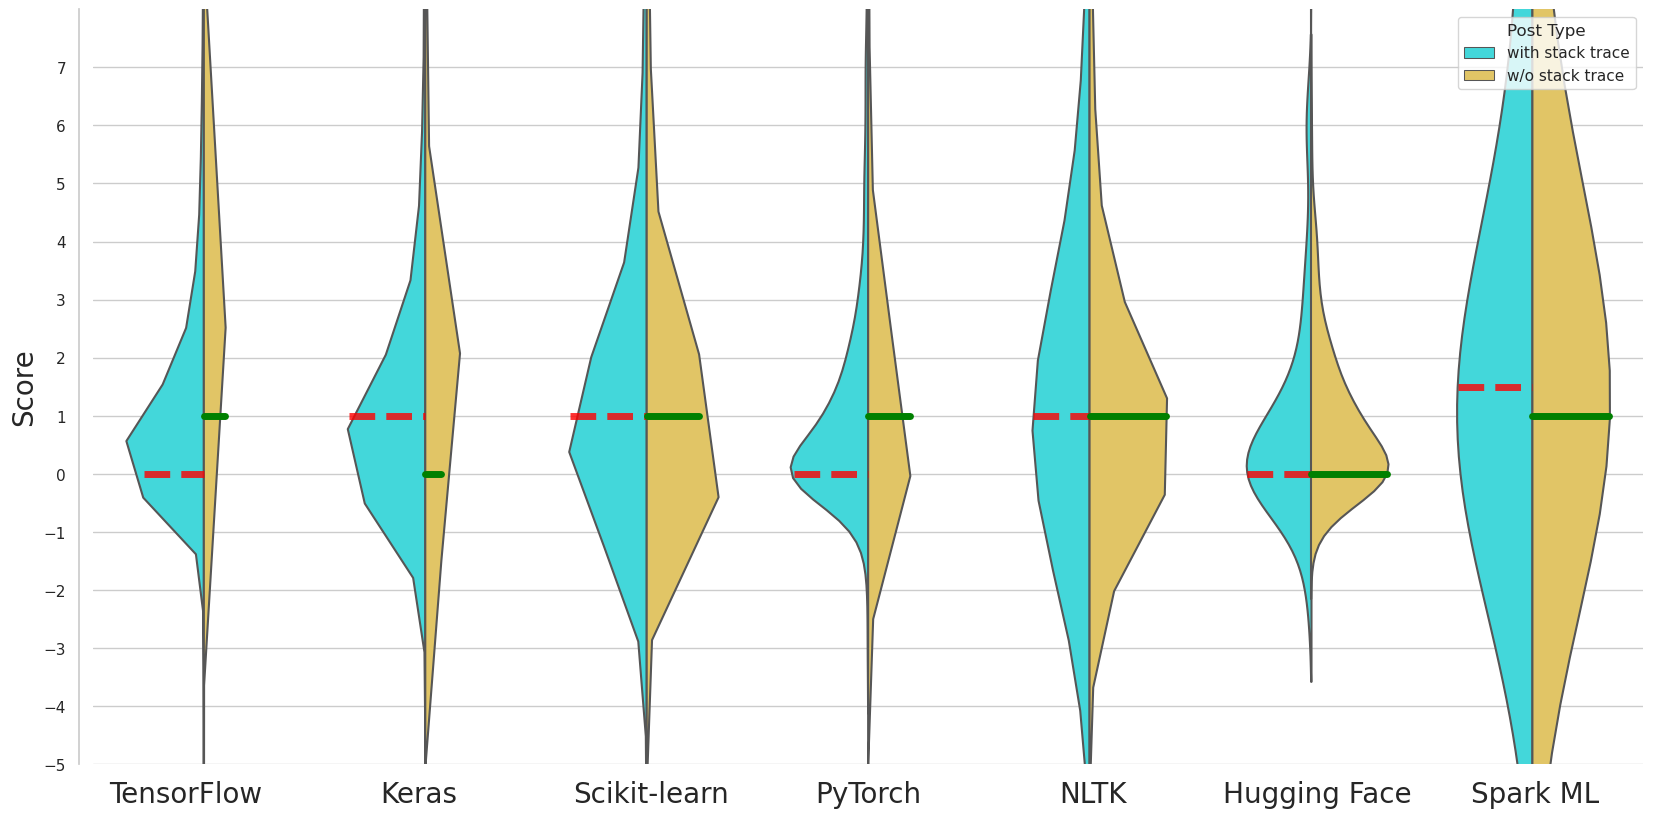

In [57]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.06, 0.21, 0.36, 0.50, 0.645, 0.79, 0.93]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

    
sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Score", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(-5, 8))
g2.set_yticks(np.arange(-5, 8, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('score.pdf')
plt.show()

In [58]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [59]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [60]:
tmp_w = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [61]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=71324308.0, pvalue=0.0014608156002971651)

In [62]:
tmp_w_nan.shape

(5436, 3)

In [63]:
tmp_wo_nan.shape

(26932, 3)

## Comment

In [64]:
# sklearn
pure_data = working_directory_path + "" + "plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [65]:
# nltk
pure_data = working_directory_path + "" + "plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [66]:
# PT
pure_data = working_directory_path + "" + "plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [67]:
# keras
pure_data = working_directory_path + "" + "plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [68]:
# hugh
pure_data = working_directory_path + "" + "plt_df_hugh_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_hugh_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [69]:
# spark
pure_data = working_directory_path + "" + "plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [70]:
# tf
pure_data = working_directory_path + "" + "plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Comment_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Comment_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [71]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

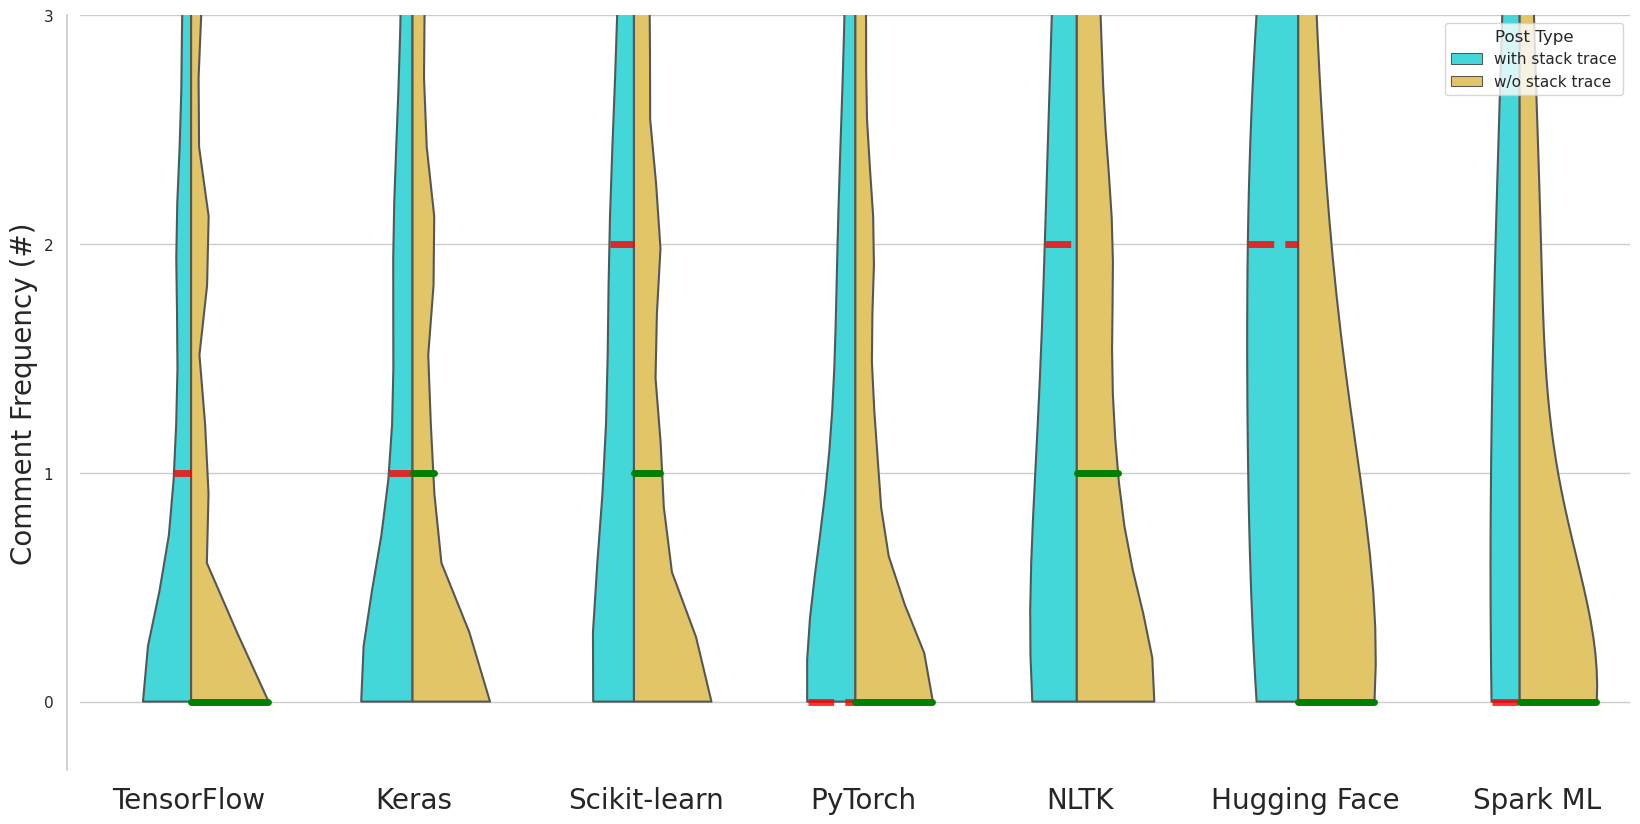

In [72]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Comment Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 3))
g2.set_ylim(bottom=-0.3)
g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('comment.pdf')
plt.show()

In [73]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [74]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    0.0
Name: 50%, dtype: float64

In [75]:
tmp_w = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [76]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=956.5, pvalue=0.5318231043421153)

In [77]:
tmp_w_nan.shape

(16, 3)

In [78]:
tmp_wo_nan.shape

(110, 3)

## View 

In [79]:
# sklearn
pure_data = working_directory_path + "" + "plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [80]:
# nltk
pure_data = working_directory_path + "" + "plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [81]:
# PT
pure_data = working_directory_path + "" + "plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [82]:
# keras
pure_data = working_directory_path + "" + "plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [83]:
# hugh
pure_data = working_directory_path + "" + "plt_df_hugh_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_hugh_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [84]:
# spark
pure_data = working_directory_path + "" + "plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [85]:
# tf
pure_data = working_directory_path + "" + "plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['View_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['View_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [86]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

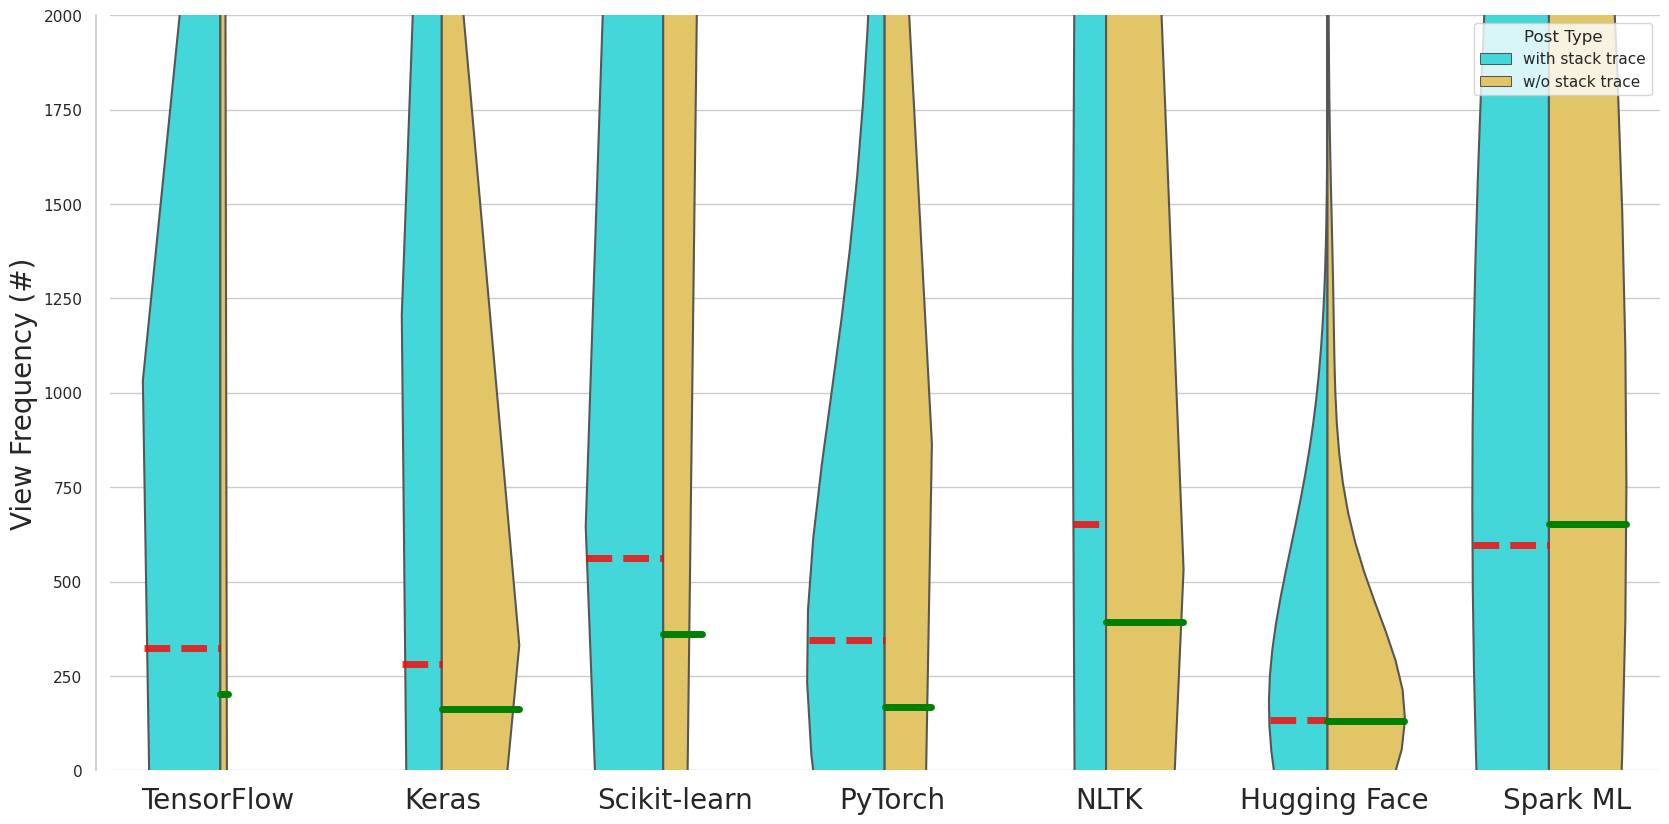

In [87]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("View Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 2000))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('view.pdf')
plt.show()

In [88]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    324.0
Name: 50%, dtype: float64

In [89]:
result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    202.0
Name: 50%, dtype: float64

In [90]:
tmp_w = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("TensorFlow", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [91]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=82660850.0, pvalue=3.287751072658961e-51)

In [92]:
tmp_w_nan.shape

(5436, 3)

In [93]:
tmp_wo_nan.shape

(26932, 3)

## Answer_count

In [94]:
# sklearn
pure_data = working_directory_path + "" + "plt_df_sklearn_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sklearn_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sklearn_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sklearn_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sklearn = pd.concat([df_1, df_2], ignore_index=True)
result_sklearn['Type'] = "Question Type"

In [95]:
# nltk
pure_data = working_directory_path + "" + "plt_df_nltk_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_nltk_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_nltk_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_nltk_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_nltk = pd.concat([df_1, df_2], ignore_index=True)
result_nltk['Type'] = "Question Type"

In [96]:
# PT
pure_data = working_directory_path + "" + "plt_df_pt_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_pt_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_pt_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_pt_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_pt = pd.concat([df_1, df_2], ignore_index=True)
result_pt['Type'] = "Question Type"

In [97]:
# keras
pure_data = working_directory_path + "" + "plt_df_keras_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_keras_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_keras_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_keras_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_keras = pd.concat([df_1, df_2], ignore_index=True)
result_keras['Type'] = "Question Type"

In [98]:
# hugh
pure_data = working_directory_path + "" + "plt_df_hugh_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_hugh_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_hug_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_hug_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_hug = pd.concat([df_1, df_2], ignore_index=True)
result_hug['Type'] = "Question Type"

In [99]:
# spark
pure_data = working_directory_path + "" + "plt_df_sp_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_sp_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_sp_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_sp_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_sp = pd.concat([df_1, df_2], ignore_index=True)
result_sp['Type'] = "Question Type"

In [100]:
# tf
pure_data = working_directory_path + "" + "plt_df_tf_w_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_w_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_tf_wo_table3_stack.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf_wo_stack = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")
    
# ###################################################################################
df_1 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_1['Frequency'] = df_tf_w_stack['Answer_count']
df_1['Question Type'] = df_1['Question Type'].apply(lambda x: "with stack trace")

df_2 = pd.DataFrame(columns=['Question Type', 'Frequency'])
df_2['Frequency'] = df_tf_wo_stack['Answer_count']
df_2['Question Type'] = df_2['Question Type'].apply(lambda x: "w/o stack trace")
# ###################################################################################
result_tf = pd.concat([df_1, df_2], ignore_index=True)
result_tf['Type'] = "Question Type"

In [101]:
result_tf['Type']      = result_tf.Type.apply(lambda x: ("TensorFlow", x))
result_keras['Type']   = result_keras.Type.apply(lambda x: ("Keras", x))
result_sklearn['Type'] = result_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
result_pt['Type']      = result_pt.Type.apply(lambda x: ("PyTorch", x))
result_nltk['Type']    = result_nltk.Type.apply(lambda x: ("NLTK", x))
result_hug['Type']     = result_hug.Type.apply(lambda x: ("Hugging Face", x))
result_sp['Type']      = result_sp.Type.apply(lambda x: ("Spark ML", x))

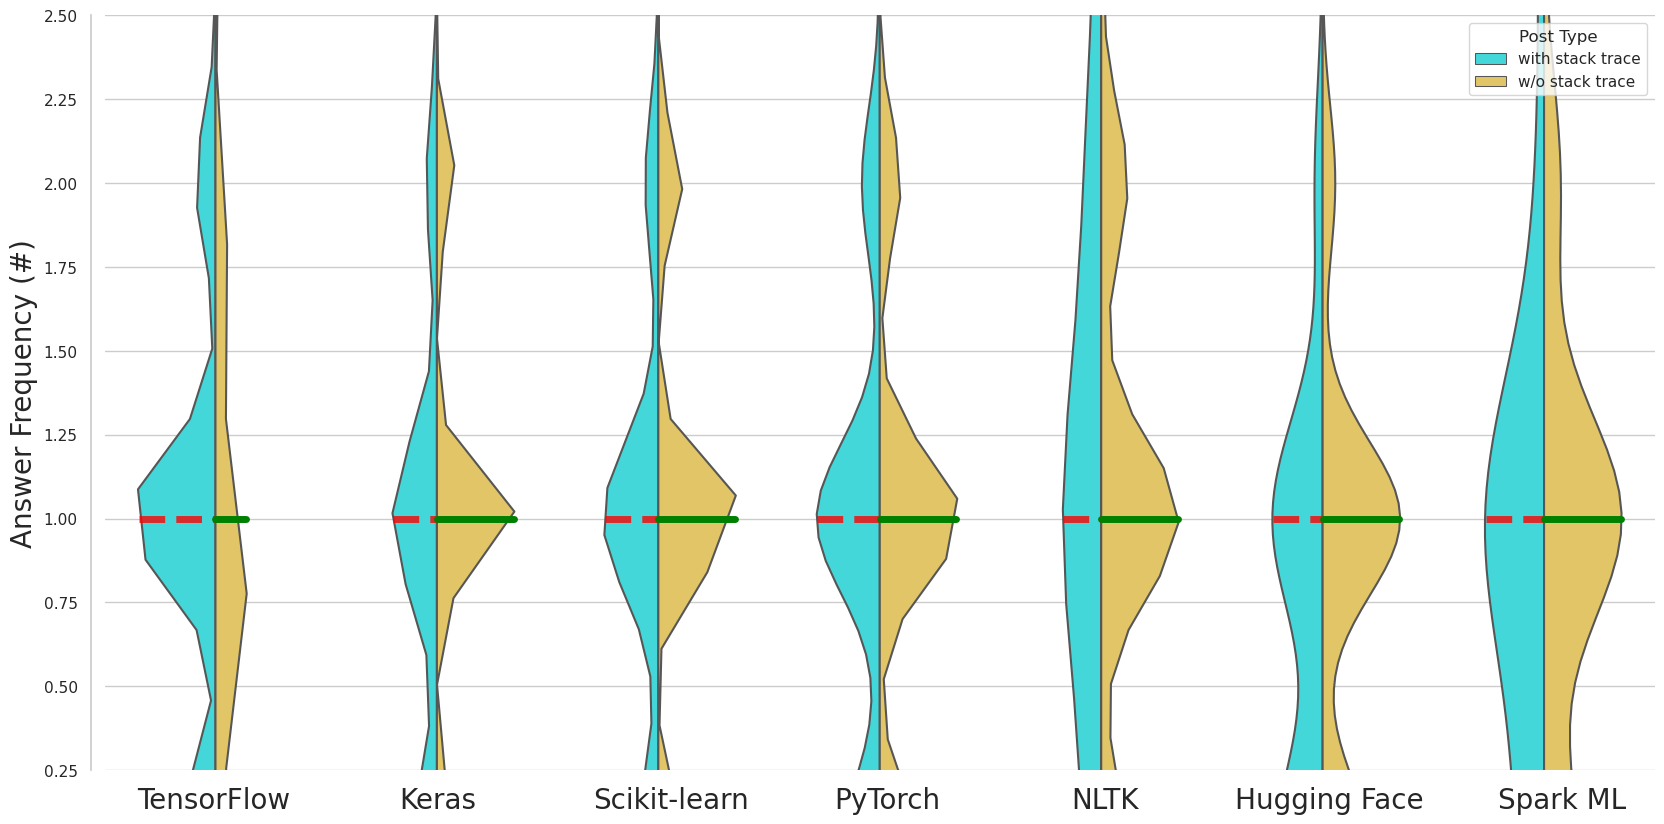

In [102]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([result_tf, result_keras, result_sklearn, result_pt, result_nltk, result_hug, result_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2= sns.violinplot(x="Type", 
                   y="Frequency", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Answer Frequency (#)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0.25, 2.5))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('answer_count.pdf')
plt.show()

In [103]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [104]:
result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Frequency    1.0
Name: 50%, dtype: float64

In [105]:
tmp_w = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Frequency'].isnull()]
tmp_wo = result[(result.Type == ("Spark ML", "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Frequency'].isnull()]

In [106]:
mannwhitneyu(tmp_w_nan["Frequency"], tmp_wo_nan["Frequency"])

MannwhitneyuResult(statistic=861.5, pvalue=0.8800643782476305)

In [107]:
tmp_w_nan.shape

(16, 3)

In [108]:
tmp_wo_nan.shape

(110, 3)

## Q length

In [109]:
pure_data = working_directory_path + "" + "plt_df_ques_len_hug.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_hug = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_keras.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_keras = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_nltk.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_nltk = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_pt.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_pt = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_sklearn.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sklearn = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_sp.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_sp = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_ques_len_tf.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_tf = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

In [110]:
df_tf['Type']      = df_tf.Type.apply(lambda x: ("TensorFlow", x))
df_keras['Type']   = df_keras.Type.apply(lambda x: ("Keras", x))
df_sklearn['Type'] = df_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
df_pt['Type']      = df_pt.Type.apply(lambda x: ("PyTorch", x))
df_nltk['Type']    = df_nltk.Type.apply(lambda x: ("NLTK", x))
df_hug['Type']     = df_hug.Type.apply(lambda x: ("Hugging Face", x))
df_sp['Type']      = df_sp.Type.apply(lambda x: ("Spark ML", x))

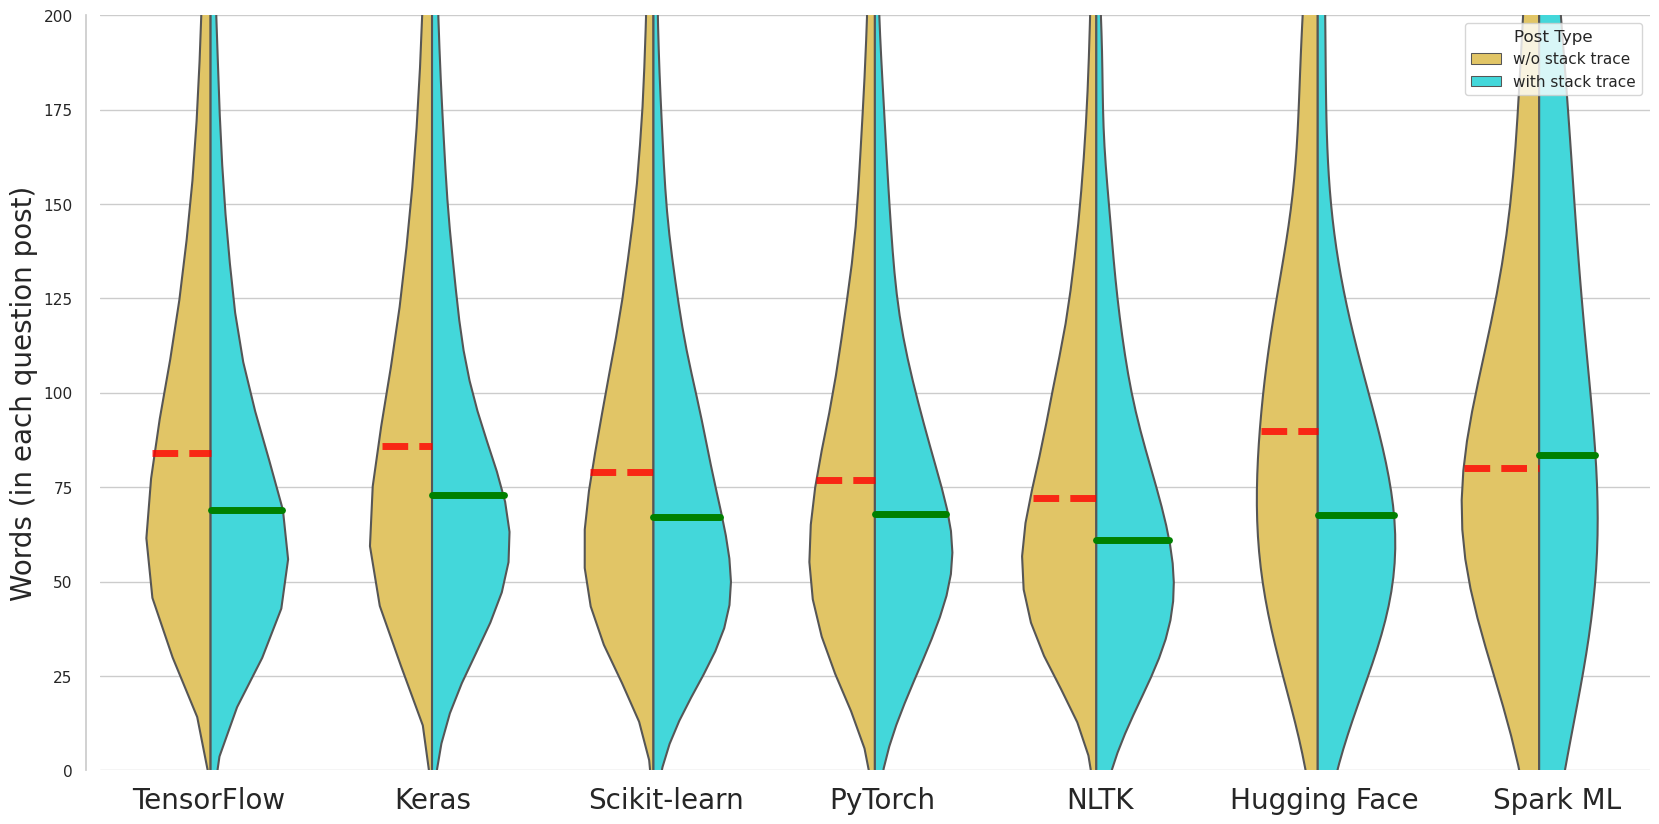

In [111]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([df_tf, df_keras, df_sklearn, df_pt, df_nltk, df_hug, df_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2 = sns.violinplot(x="Type", 
                   y="Words (in each question post)", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"with stack trace": "#2AEFF3", "w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
# g2.set(title='Score Frequency')
g2.set_ylabel("Words (in each question post)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 200))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('q_length.pdf')
plt.show()

In [112]:
ml = "Spark ML"

In [113]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "with stack trace")].describe().iloc[5]

Words (in each question post)    83.5
Name: 50%, dtype: float64

In [114]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "w/o stack trace")].describe().iloc[5]

Words (in each question post)    80.0
Name: 50%, dtype: float64

In [115]:
tmp_w = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['Words (in each question post)'].isnull()]
tmp_wo = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['Words (in each question post)'].isnull()]

In [116]:
mannwhitneyu(tmp_w_nan["Words (in each question post)"], tmp_wo_nan["Words (in each question post)"])

MannwhitneyuResult(statistic=1016.5, pvalue=0.917161227400691)

In [117]:
tmp_w_nan.shape

(16, 3)

In [118]:
tmp_wo_nan.shape

(125, 3)

## LOC

In [119]:
pure_data = working_directory_path + "" + "plt_df_loc_hug.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_hug = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_keras.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_keras = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_nltk.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_nltk = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_pt.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_pt = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_sklearn.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_sklearn = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_sp.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_sp = pd.read_csv(path, encoding=encoding, index_col=False)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

pure_data = working_directory_path + "" + "plt_df_loc_tf.csv"
path = Path(pure_data)

if path.suffix == ".csv":
    df_loc_tf = pd.read_csv(path, encoding=encoding)
else:
    raise ValueError("{data_file_path.suffix} extensions are not supported.")

In [120]:
df_loc_tf['Type']      = df_loc_tf.Type.apply(lambda x: ("TensorFlow", x))
df_loc_keras['Type']   = df_loc_keras.Type.apply(lambda x: ("Keras", x))
df_loc_sklearn['Type'] = df_loc_sklearn.Type.apply(lambda x: ("Scikit-learn", x))
df_loc_pt['Type']      = df_loc_pt.Type.apply(lambda x: ("PyTorch", x))
df_loc_nltk['Type']    = df_loc_nltk.Type.apply(lambda x: ("NLTK", x))
df_loc_hug['Type']     = df_loc_hug.Type.apply(lambda x: ("Hugging Face", x))
df_loc_sp['Type']      = df_loc_sp.Type.apply(lambda x: ("Spark ML", x))

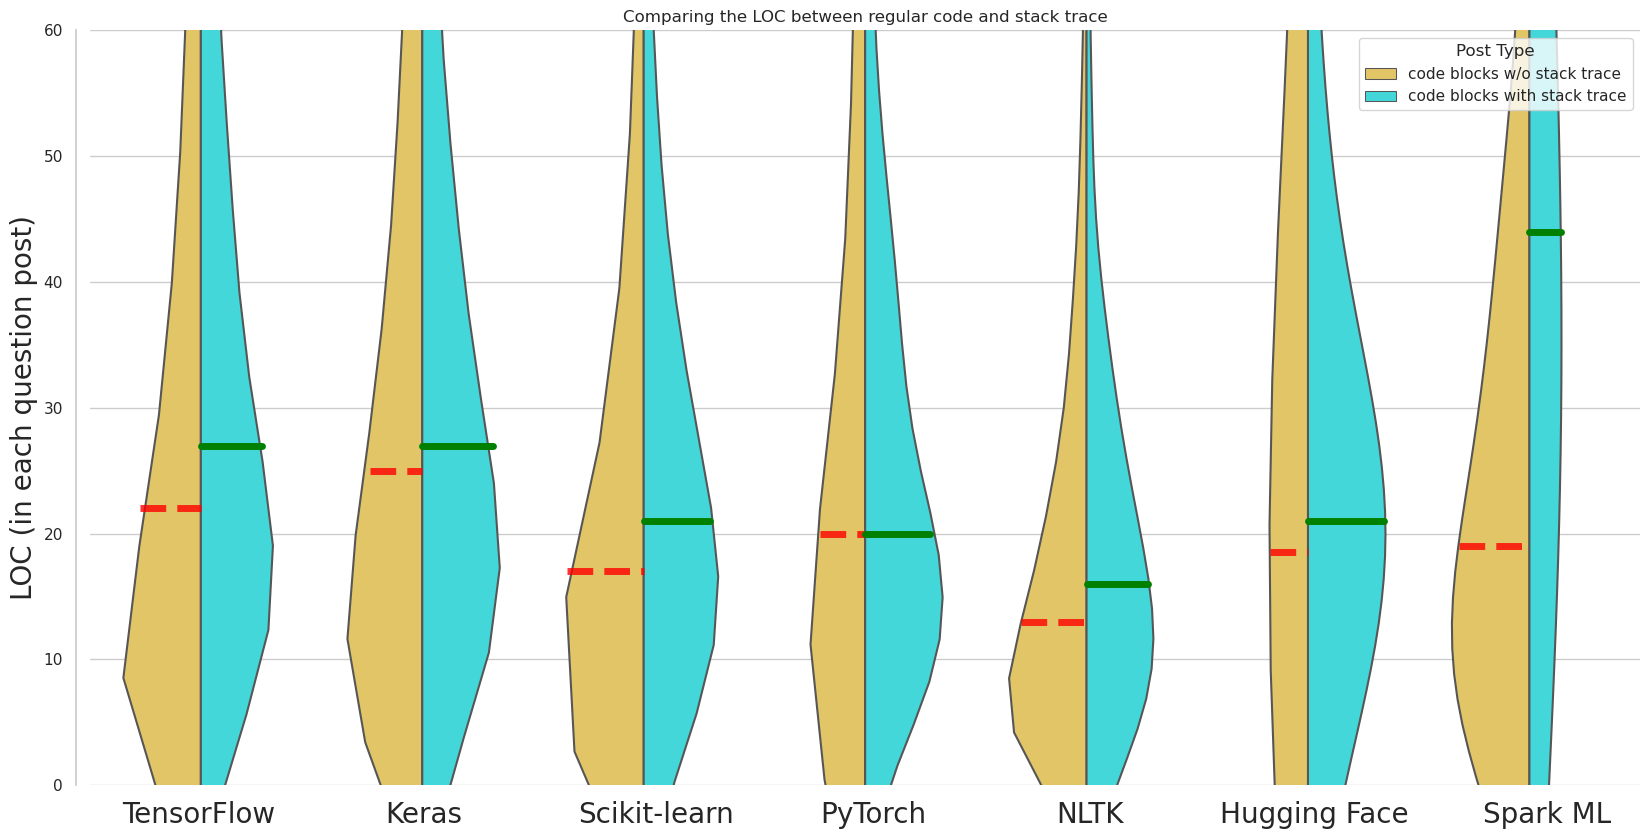

In [121]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

result = pd.concat([df_loc_tf, df_loc_keras, df_loc_sklearn, df_loc_pt, df_loc_nltk, df_loc_hug, df_loc_sp], ignore_index=True)

fig = plt.figure(figsize=(20, 10), dpi=100, facecolor='white')

ax = fig.add_subplot(1,1,1)

g2 = sns.violinplot(x="Type", 
                   y="LOC (in each question post)", 
                   data=result, 
                   hue="Question Type", 
                   split=True,
                    # scale_hue=False, 
                   # bw=.2, 
                   width=.7,
                   # showcaps=False,
                   # scale="count",
                   inner="quart",
                   color='white',
                   palette={"code blocks with stack trace": "#2AEFF3", "code blocks w/o stack trace": "#F6D051"}, #"Set3", #colorblind or "deep"
                   # scale_hue=False,
                   # cut=0,
                  dogde=False,
                  )

def add_line(ax, xpos, ypos, flag=-1):
    linestyles = dict(
    [ 

     ('loosely dashed',      (0, (5, 20))),
     ('dashed',              (0, (10, 4))),
     ('densely dashed',      (0, (1, 3))),

    ])
    
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    
    if flag == 1:
        line = plt.Line2D([xpos, xpos], [ypos + .5, ypos + .05], transform=ax.transAxes, color='black', linestyle=linestyles['dashed'])
    line.set_clip_on(False)
    ax.add_line(line)

scale = .14 / 4
ypos = -.1
groups = [[('TensorFlow', 2), ('Keras', 2), ('Scikit-learn', 2), ('PyTorch', 2), ('NLTK', 2), ('Hugging Face', 2), ('Spark ML', 2)]]

xposs = [ 0.15, 0.29, 0.43, 0.57, 0.72, 0.86, 1]
yposs = [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
tx_poss = [0.07, 0.215, 0.365, 0.505, 0.645, 0.79, 0.94]        
ty_poss = [-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05]
i = 0

while groups:
    group = groups.pop()
    pos = 0
    for label, rpos in group:
        lxpos = (pos + .5 * rpos) * scale
        ax.text(tx_poss[i], ty_poss[i], label, ha='center', transform=ax.transAxes, fontsize=20)
        # add_line(ax, xposs[i], yposs[i], flag=1)

        i += 1
        pos += rpos
    ypos -= .1

sns.despine(bottom=True, offset=10, trim=False, left=False)

g2.set(xticklabels=[]) 
g2.set(title='Comparing the LOC between regular code and stack trace')
g2.set_ylabel("LOC (in each question post)", fontsize = 20)
g2.set(xlabel=None)
g2.set(ylim=(0, 60))
# g2.set_ylim(bottom=-50)
# g2.set_yticks(np.arange(0, 3.1, 1))

# Legend
g2.legend(title='Post Type', loc='upper right')

for l in g2.lines[1:42:6]:
    l.set_linestyle('--')
    l.set_linewidth(5)
    l.set_color('red')
    l.set_alpha(0.8)

for l in g2.lines[4:42:6]:
    l.set_linestyle('solid')
    l.set_linewidth(5)
    l.set_color('green')
    l.set_alpha(1)

for l in g2.lines[0:42:3]:
    l.set_linestyle('None')
    
for l in g2.lines[2:42:3]:
    l.set_linestyle('None')

# fig.suptitle('TensorFlow Questions', prop={"size":10})
# plt.gca().axes.get_xaxis().set_visible(False)
# plt.legend(loc='upper left')
plt.savefig('loc.pdf')
plt.show()

In [122]:
ml = "Spark ML"

In [123]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks with stack trace")].describe().iloc[5]

LOC (in each question post)    44.0
Name: 50%, dtype: float64

In [124]:
result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks w/o stack trace")].describe().iloc[5]

LOC (in each question post)    19.0
Name: 50%, dtype: float64

In [125]:
tmp_w = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks with stack trace")]
tmp_w_nan = tmp_w[~tmp_w['LOC (in each question post)'].isnull()]
tmp_wo = result[(result.Type == (ml, "Question Type")) & (result["Question Type"] == "code blocks w/o stack trace")]
tmp_wo_nan = tmp_wo[~tmp_wo['LOC (in each question post)'].isnull()]

In [126]:
mannwhitneyu(tmp_w_nan["LOC (in each question post)"], tmp_wo_nan["LOC (in each question post)"])

MannwhitneyuResult(statistic=1308.0, pvalue=0.0017286869922962535)

In [127]:
tmp_w_nan.shape

(16, 3)

In [128]:
tmp_wo_nan.shape

(110, 3)

# RQ2

Import all windows_size data

In [129]:
dic_hug_win     = pickle.load( open( "./dic_hug_win.p", "rb" ) )
dic_keras_win   = pickle.load( open( "./dic_keras_win.p", "rb" ) )
dic_nltk_win    = pickle.load( open( "./dic_nltk_win.p", "rb" ) )
dic_pt_win      = pickle.load( open( "./dic_pt_win.p", "rb" ) )
dic_sklearn_win = pickle.load( open( "./dic_sklearn_win.p", "rb" ) )
dic_spark_win   = pickle.load( open( "./dic_spark_win.p", "rb" ) )
dic_tf_win      = pickle.load( open( "./dic_tf_win.p", "rb" ) )

Import all support data

In [130]:
dic_hug_sup     = pickle.load( open( "./dic_hug_sup.p", "rb" ) )
dic_keras_sup   = pickle.load( open( "./dic_keras_sup.p", "rb" ) )
dic_nltk_sup    = pickle.load( open( "./dic_nltk_sup.p", "rb" ) )
dic_pt_sup      = pickle.load( open( "./dic_pt_sup.p", "rb" ) )
dic_sklearn_sup = pickle.load( open( "./dic_sklearn_sup.p", "rb" ) )
dic_spark_sup   = pickle.load( open( "./dic_spark_sup.p", "rb" ) )
dic_tf_sup      = pickle.load( open( "./dic_tf_sup.p", "rb" ) )

In [210]:
total_result_win_x = [dic_hug_win["x"], 
                      dic_keras_win["x"], 
                      dic_nltk_win["x"], 
                      dic_pt_win["x"], 
                      dic_sklearn_win["x"], 
                      dic_spark_win["x"], 
                      dic_tf_win["x"]]

total_result_win_y = [dic_hug_win["y"], 
                      dic_keras_win["y"], 
                      dic_nltk_win["y"], 
                      dic_pt_win["y"], 
                      dic_sklearn_win["y"], 
                      dic_spark_win["y"], 
                      dic_tf_win["y"]]

label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark", "TensorFlow"]



# ax.plot(x,x,c='b',marker="^",ls='--',label='GNE',fillstyle='none')

my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]
# ValueError: ',' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'


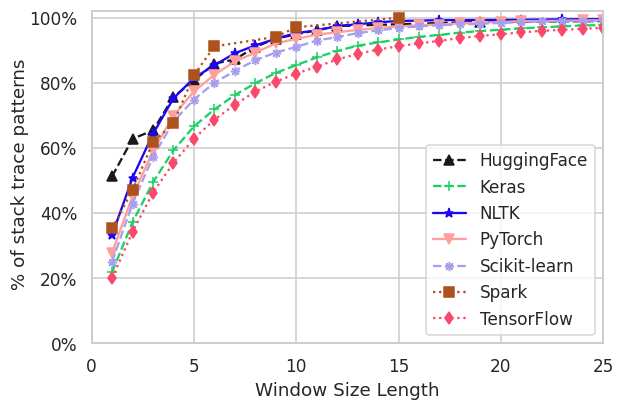

In [233]:
fig = plt.figure(figsize=(6, 4), dpi=110)
ax1 = fig.add_subplot(111)

plt_lst = []
for x, y, l, s in zip(total_result_win_x, total_result_win_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2]))
    
ax1.legend(loc='lower right')
ax1.set_xlabel('Window Size Length')
ax1.set_ylabel(' % of stack trace patterns', labelpad=0)
# ax1.set_title('RQ2')

ax1.axis(ymin=0, ymax=102)
ax1.axis(xmin=0, xmax=25)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(True)
plt.savefig('window_rq2.pdf')
plt.show()

In [216]:
total_result_sup_x = [dic_hug_sup["x"], 
                      dic_keras_sup["x"], 
                      dic_nltk_sup["x"], 
                      dic_pt_sup["x"], 
                      dic_sklearn_sup["x"], 
                      dic_spark_sup["x"], 
                      dic_tf_sup["x"]]

total_result_sup_y = [dic_hug_sup["y"], 
                      dic_keras_sup["y"], 
                      dic_nltk_sup["y"], 
                      dic_pt_sup["y"], 
                      dic_sklearn_sup["y"], 
                      dic_spark_sup["y"], 
                      dic_tf_sup["y"]]

label = ["HuggingFace", "Keras", "NLTK", "PyTorch", "Scikit-learn", "Spark", "TensorFlow"]
my_style = [('k', "^", '--'), ('#1bd164', "+", '--'), ('#1D05F5', "*", '-'), ('r', "v", '-'), ('#A79FED', (8,2,0), '--'), ('#AD521D', "s", ':'), ('#FA496A', "d", 'dotted')]

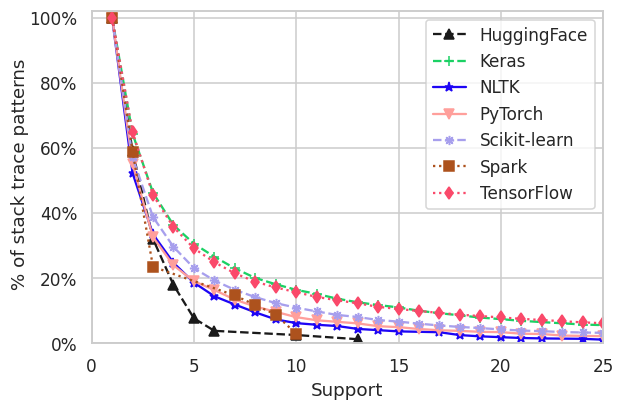

In [234]:
from cycler import cycler

fig = plt.figure(figsize=(6, 4), dpi=110)
ax1 = fig.add_subplot(111)
# ax1.set_prop_cycle(marker_cycler)

plt_lst = []
for x, y, l, s in zip(total_result_sup_x, total_result_sup_y, label, my_style):
    plt_lst.append(ax1.plot(x, y, label=l, c=s[0], marker=s[1], ls=s[2]))
    
ax1.legend(loc='upper right')
ax1.set_xlabel('Support')
ax1.set_ylabel(' % of stack trace patterns', labelpad=0)
# ax1.set_title('RQ2')

ax1.axis(ymin=0, ymax=102)
ax1.axis(xmin=0, xmax=25)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.grid(True)
plt.savefig('sup_rq2.pdf')
plt.show()